# Analysis of the SOM with CNN

In [1]:
from __future__ import print_function

import tensorflow as tf
from tensorflow.python.tools import inspect_checkpoint as chkp
from tensorflow.python.platform import gfile
from tensorflow.contrib.framework.python.ops import audio_ops as contrib_audio
# boilerplate code

import os
from io import BytesIO
import numpy as np
import random
from functools import partial
import PIL.Image
from IPython.display import clear_output, Image, display, HTML
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D
import somoclu
import deep_som as ds
import time
import matplotlib.cm as cm
from pathlib import Path
import pprint, pickle

import utils

%matplotlib inline

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## 1 - Load CNN

In [2]:
cnn_directory = r"C:\tmp\speech_commands_train"
checkpoint_name = "conv.ckpt-18000"
graph_name = "conv.pbtxt"
tensor_name="MatMul"
som_directory = ""

In [3]:
sess = utils.load_speech_command_cnn(cnn_directory, checkpoint_name)
ms = utils.init_cnn_model_settings()
output_tensor = utils.restore_tensor(tensor_name)
mfcc_tensor_flatten, mfcc_tensor = utils.build_preproc_graph_for_cnn()

INFO:tensorflow:Restoring parameters from C:\tmp\speech_commands_train\conv.ckpt-18000


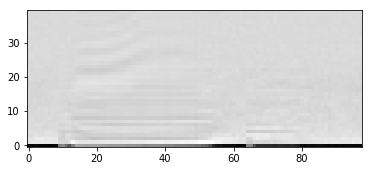

In [4]:
wav_fname = r"C:\tmp\speech_dataset\dog\00f0204f_nohash_1.wav"
mfcc = sess.run(mfcc_tensor, feed_dict={"wav_data:0": wav_fname})
plt.imshow(mfcc.T.squeeze(), origin='lower', cmap='gray')
plt.show()

## 2 - Load training set

In [5]:
with open('cnn_200_training.pickle', 'rb') as f:
    train = pickle.load(f)
train_x = train["input"]
train_y = train["out"]